In [1]:
#MSSI analysis

In [40]:
#INITIALIZION
from os import listdir
from os.path import isfile, join
#os.sys.path.append('/usr/common/software/rootpy')
#os.sys.path.insert(0,'/usr/common/software/uproot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('GTK3Agg')
import ROOT
import pandas as pd
from scipy.optimize import curve_fit

import sys
from matplotlib.colors import LogNorm
import pylab

import glob
import uproot

import scipy
from scipy.optimize import curve_fit

%pylab inline
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

print("Starting notebook....")



Populating the interactive namespace from numpy and matplotlib
Starting notebook....


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
filename = "/data/rossiter/lz/baccarat/lz_xenon_Xe131m_NEW_g4decay_6.12e9_MSSI_reduced.root"#lz_xenon_Xe131m_NEW_g4decay_6.18e8_MSSI_reduced.root"#lz_xenon_Xe131m_NEW_g4decay_5.38e8_MSSI_reduced.root"#example_hadd.root"
#filename="/data/rossiter/lz/baccarat/Xe131mBGAnalysis_1e10_171012_Reduced_MSSI/lz_xenon_Xe131m_NEW_g4decay_1e6_9_MSSI_reduced.root"

filename_2 = "/home/rossiter/Xe131m_Generator/ReducedAnalysis/DaveTDR/ReducedAnalysisTree/NEWXe131m_1e7_20170814_reduced.root"

#Input filenames
input_ER_filename = "/home/rossiter/ThesisPlots/Ch3/ERandNRbands_200417/ERband.dat"
input_NR_filename = "/home/rossiter/ThesisPlots/Ch3/ERandNRbands_200417/NRband.dat"




In [4]:
#constants LZ sims 2016
W = 13.7/1000.
g1 = .075
g2 = 59.2

Emax= 70.#67.480425777

S1max= (Emax/W)*g1
S2max= (Emax/W)*g2

print "S1max = "+str(S1max)
print "S2max = "+str(S2max)

S1max = 383.211678832
S2max = 302481.751825


In [5]:
#Functions aaaaa
    
#fit linear line
def fit_func(x, a, b):
    return a*x + b

#Get NR band events
def Check_NR_band(S1in, S2in):
    log10_S2in=np.log10(np.asarray(S2in))
    #print "log10_S2in_lo\tlog10_S2in\tlog10_S2in_lo"
    for i in range(0, len(NR_S2mean_list)):
        if S1in > NR_S1mean_list[i] and S1in < NR_S1mean_list[i+1]:
            m_up=(NR_S2upper_list[i+1] - NR_S2upper_list[i]) / (NR_S1mean_list[i+1] - NR_S1mean_list[i])
            m_lo=(NR_S2lower_list[i+1] - NR_S2lower_list[i]) / (NR_S1mean_list[i+1] - NR_S1mean_list[i])
            c_up = NR_S2upper_list[i] - (m_up*NR_S1mean_list[i])
            c_lo = NR_S2lower_list[i] - (m_lo*NR_S1mean_list[i])
            log10_S2in_up = m_up*S1in + c_up
            log10_S2in_lo = m_lo*S1in + c_lo
            #print "m_up = "+str(m_up)
            #print "m_lo = "+str(m_lo)
            #print "c_up = "+str(c_up)
            #print "c_lo = "+str(c_lo)
            #print str(NR_S1mean_list[i])+" < "+str(S1in)+" < "+str(NR_S1mean_list[i+1])
            #print str(log10_S2in_lo)+" < "+str(log10_S2in)+" < "+str(log10_S2in_up)
            if log10_S2in < log10_S2in_up and log10_S2in > log10_S2in_lo:
                return 1
            else:
                return 0
            
            
            #params_up = curve_fit(fit_func, [NR_S1mean_list[i],NR_S1mean_list[i+1]], [NR_S2upper_list[i], NR_S2upper_list[i+1]] )
            #print params_up
            break
    return 0

#Apply NR band cut
def NRband_cut(S1in_list, S2in_list, Rin_list, Zin_list):
    S1_NR_list = []
    S2_NR_list = []
    R_NR_list = []
    Z_NR_list = []
    for i in range(0, len(S2in_list)):
        a=Check_NR_band( S1in_list[i], S2in_list[i] )
        #print a
        #print S2in_list[i]
        if a ==1:
            S1_NR_list.append(S1in_list[i])
            S2_NR_list.append(S2in_list[i])
            #fLXeR_cm, fLXeZ_cm
            R_NR_list.append(Rin_list)
            Z_NR_list.append(Zin_list)
    return S1_NR_list, S2_NR_list, R_NR_list, Z_NR_list

#Check_NR_band(100., 4.5)
#cuts= rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts
#S1_NR_list, S2_NR_list, R_NR_list, Z_NR_list = NRband_cut( fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts], np.log10(fLXeS2c_phe[cuts]),fLXeR_cm[cuts], fLXeZ_cm[cuts] )
#print len(S1_NR_list)




In [6]:
#Get NR and ER bands

def GetBand(filename):
    file = open(filename, 'r')

    a=file.read().split("\n")

    lines =[]
    E_recon_list = []
    S1mean_list = []
    S2mean_list = []
    S2upper_list=[]
    S2lower_list=[]

    for line in a:
        if line.startswith('0') or line.startswith('1') or line.startswith('2') or line.startswith('3') or line.startswith('4') or line.startswith('5') or line.startswith('6') or line.startswith('7') or line.startswith('8') or line.startswith('9'):
            lines.append(line)
            b=line.split('\t')

            S1=float(b[0])
            S2=float(b[2])
            S2sigma=float(b[4])
            if S1 > 20:
                S1mean_list.append(S1)
                S2mean_list.append(S2)
                S2upper_list.append(S2+2*S2sigma)
                S2lower_list.append(S2-2*S2sigma)
                #S1_list.append(float(b[7]))
                #S2_list.append(float(b[11]))
    return S1mean_list, S2mean_list, S2upper_list, S2lower_list
                
    
ER_S1mean_list, ER_S2mean_list, ER_S2upper_list, ER_S2lower_list = GetBand(input_ER_filename)
NR_S1mean_list, NR_S2mean_list, NR_S2upper_list, NR_S2lower_list = GetBand(input_NR_filename)

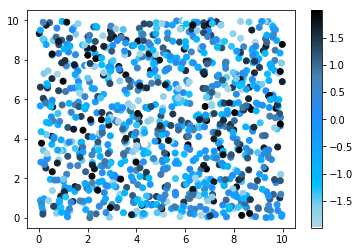

In [7]:
#Custom colormap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
#rvb = make_colormap(
#    [c('white'), c('violet'), 0.33, c('violet'), c('blue'), 0.66, c('blue'), c('black')])

Peters = make_colormap(
    #[c('white'), c('red'), 0.5, c('red'), c('black')])
    #[c('white'), c('yellow'), 0.25, c('yellow'), c('orange'), 0.5, c('orange'), c('red'), 0.75, c('red'), c('black')])
    #[c('white'), c('salmon'), 0.001, c('salmon'), c('darksalmon'), 0.1, c('darksalmon'), c('tomato'), 0.2, c('tomato'), c('red'), 0.3, c('red'), c('firebrick'), 0.5, c('firebrick'),c('darkred'), 0.7, c('darkred'),c('maroon'), 0.8, c('maroon'), c('black')])
    [c('white'), c('lightblue'), 0.001, c('lightblue'), c('skyblue'), 0.1, c('skyblue'), c('deepskyblue'), 0.2, c('deepskyblue'), c('dodgerblue'), 0.5, c('dodgerblue'),c('steelblue'), 0.7, c('steelblue'), c('black')])
#Test colormap
N = 1000
array_dg = np.random.uniform(0, 10, size=(N, 2))
colors = np.random.uniform(-2, 2, size=(N,))
plt.scatter(array_dg[:, 0], array_dg[:, 1], c=colors, cmap=Peters)
plt.colorbar()
plt.show()

# -Get cotour plot of regular Xe131m S1 S2 spectrum

In [8]:
def ReadDataFile_2(root_file):
    #list branches you want to retrive
    bg_analysis_RQs = ['fLXeX_cm', 'fLXeY_cm', 'fLXeZ_cm', 'fLXe_tot_s1c', 'fLXe_tot_s2c', 'fLXeEDepER_keV', 'fOD_keV', 'fSkinEDepER_keV']

    #Open the trees from the root file
    bg_analysis_Vertices=uproot.open(root_file)['lzsim_analysis_tree']
    #bg_analysis_Vertices.show()

    #extract the branches in the list you want from those trees
    #it returns as dictionary with those variables in them
    bg_analysis_Vertices_data=bg_analysis_Vertices.arrays(bg_analysis_RQs)

    bg_analysis_fLXeX_cm= bg_analysis_Vertices_data['fLXeX_cm']
    bg_analysis_fLXeY_cm= bg_analysis_Vertices_data['fLXeY_cm']
    bg_analysis_fLXeZ_cm= bg_analysis_Vertices_data['fLXeZ_cm']
    bg_analysis_fLXeS1c_phe= bg_analysis_Vertices_data['fLXe_tot_s1c']
    bg_analysis_fLXeS2c_phe= bg_analysis_Vertices_data['fLXe_tot_s2c']
    bg_analysis_fLXeEDepER_keV= bg_analysis_Vertices_data['fLXeEDepER_keV']
    bg_analysis_fOD_keV= bg_analysis_Vertices_data['fOD_keV']
    bg_analysis_fSkinEDepER_keV= bg_analysis_Vertices_data['fSkinEDepER_keV']
    
    bg_analysis_fLXeR_cm = pow( pow(bg_analysis_fLXeX_cm,2) + pow(bg_analysis_fLXeY_cm,2) ,.5)

    return bg_analysis_fLXeR_cm, bg_analysis_fLXeZ_cm, bg_analysis_fLXeS1c_phe, bg_analysis_fLXeS2c_phe, bg_analysis_fLXeEDepER_keV, bg_analysis_fOD_keV, bg_analysis_fSkinEDepER_keV

print "reading file"
ALL_fLXeR_cm_temp_list, ALL_fLXeZ_cm_temp_list, ALL_fLXeS1c_phe_temp_list, ALL_fLXeS2c_phe_temp_list, ALL_fLXeEDepER_keV_temp_list, ALL_fOD_keV_temp_list, ALL_fSkinEDepER_keV_temp_list =  ReadDataFile_2(filename_2)

print "cleaning lists"

ALL_fLXeR_cm_list = []
ALL_fLXeZ_cm_list= []
ALL_fLXeS1c_phe_list= []
ALL_fLXeS2c_phe_list= []
ALL_fLXeEDepER_keV_list= []
ALL_fOD_keV_list= []
ALL_fSkinEDepER_keV_list=[]

#fOD_keV

limit = len(ALL_fLXeR_cm_temp_list)
for i in range(0, limit):
    if i % 100000 ==0:
        print "\t"+str(i)+" / "+str(limit)
    if len(ALL_fLXeR_cm_temp_list[i]) == 1 and len(ALL_fLXeZ_cm_temp_list[i]) == 1 and len(ALL_fLXeS1c_phe_temp_list[i]) == 1 and len(ALL_fLXeS2c_phe_temp_list[i]) == 1 and len(ALL_fLXeEDepER_keV_temp_list[i]) == 1:
        if ALL_fLXeEDepER_keV_temp_list[i][0] > 163.929 and ALL_fLXeEDepER_keV_temp_list[i][0] < 163.931:
            ALL_fLXeR_cm_list.append(ALL_fLXeR_cm_temp_list[i][0])
            ALL_fLXeZ_cm_list.append(ALL_fLXeZ_cm_temp_list[i][0])
            ALL_fLXeS1c_phe_list.append(ALL_fLXeS1c_phe_temp_list[i][0])
            ALL_fLXeS2c_phe_list.append(ALL_fLXeS2c_phe_temp_list[i][0])
            ALL_fLXeEDepER_keV_list.append(ALL_fLXeEDepER_keV_temp_list[i][0])
            ALL_fOD_keV_list.append(sum(ALL_fOD_keV_temp_list[i]))
            ALL_fSkinEDepER_keV_list.append(sum(ALL_fSkinEDepER_keV_temp_list[i]))
            #if len(ALL_fOD_keV_temp_list[i])==0:
            #    ALL_fOD_keV_list.append(0)
            #elif len(ALL_fOD_keV_temp_list[i])>0:
            #    ALL_fOD_keV_list.append(sum(ALL_fOD_keV_temp_list[i]))
            #if len(ALL_fSkinEDepER_keV_temp_list[i]) ==0:
            #    ALL_fSkinEDepER_keV_list.append(0)
            #elif len(ALL_fSkinEDepER_keV_temp_list[i])>0:
            #    ALL_fSkinEDepER_keV_list.append(sum(ALL_fSkinEDepER_keV_temp_list[i]))
print "min(ALL_fLXeR_cm_list): "+str(min(ALL_fLXeR_cm_list))
print "max(ALL_fLXeR_cm_list): "+str(max(ALL_fLXeR_cm_list))
print "len(ALL_fLXeR_cm_list): "+str(len(ALL_fLXeR_cm_list))

print "\nmin(ALL_fLXeZ_cm_list): "+str(min(ALL_fLXeZ_cm_list))
print "max(ALL_fLXeZ_cm_list): "+str(max(ALL_fLXeZ_cm_list))

print "\nmin(ALL_fLXeS1c_phe_list): "+str(min(ALL_fLXeS1c_phe_list))
print "max(ALL_fLXeS1c_phe_list): "+str(max(ALL_fLXeS1c_phe_list))

print "\nmin(ALL_fLXeS2c_phe_list): "+str(min(ALL_fLXeS2c_phe_list))
print "max(ALL_fLXeS2c_phe_list): "+str(max(ALL_fLXeS2c_phe_list))

print("\n\t...Done!")

print("\n\t...Done!")

reading file
cleaning lists
	0 / 4905519
	100000 / 4905519
	200000 / 4905519
	300000 / 4905519
	400000 / 4905519
	500000 / 4905519
	600000 / 4905519
	700000 / 4905519
	800000 / 4905519
	900000 / 4905519
	1000000 / 4905519
	1100000 / 4905519
	1200000 / 4905519
	1300000 / 4905519
	1400000 / 4905519
	1500000 / 4905519
	1600000 / 4905519
	1700000 / 4905519
	1800000 / 4905519
	1900000 / 4905519
	2000000 / 4905519
	2100000 / 4905519
	2200000 / 4905519
	2300000 / 4905519
	2400000 / 4905519
	2500000 / 4905519
	2600000 / 4905519
	2700000 / 4905519
	2800000 / 4905519
	2900000 / 4905519
	3000000 / 4905519
	3100000 / 4905519
	3200000 / 4905519
	3300000 / 4905519
	3400000 / 4905519
	3500000 / 4905519
	3600000 / 4905519
	3700000 / 4905519
	3800000 / 4905519
	3900000 / 4905519
	4000000 / 4905519
	4100000 / 4905519
	4200000 / 4905519
	4300000 / 4905519
	4400000 / 4905519
	4500000 / 4905519
	4600000 / 4905519
	4700000 / 4905519
	4800000 / 4905519
	4900000 / 4905519
min(ALL_fLXeR_cm_list): 0.018004753
m

(150, 750)

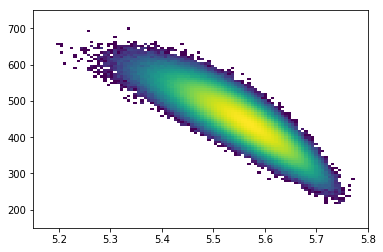

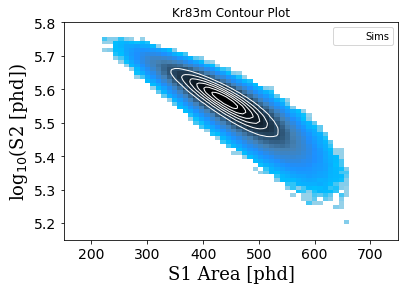

In [9]:
#S1 vs logS2 - initializing contour plot
num_bins= 50#339#50

y_lo, y_hi =5.15, 5.8
x_lo, x_hi = 150, 750

plt.figure(1)
counts_sims_lS2, ybins_sims_lS2, xbins_sims_lS2, image_sims_lS2 = hist2d(np.log10(np.asarray(ALL_fLXeS2c_phe_list)), np.asarray(ALL_fLXeS1c_phe_list),bins=100,range=[[y_lo, y_hi],[x_lo, x_hi]],norm=LogNorm())#hist2d(y_sim,x_sim,bins=100,norm=LogNorm())

#S1 vs logS2 - contour plot
plt.figure(2)
matplotlib.pyplot.hist2d(np.asarray(ALL_fLXeS1c_phe_list), np.log10(np.asarray(ALL_fLXeS2c_phe_list)), norm=mpl.colors.LogNorm(), bins=num_bins, cmap=Peters)#, normed=True)


contour(counts_sims_lS2,extent=[xbins_sims_lS2.min(),xbins_sims_lS2.max(),ybins_sims_lS2.min(),ybins_sims_lS2.max()],linewidths=1, colors="w")
pylab.plot([250, 250.01], [3.5, 3.51], '-w', label='Sims')
plt.title("Kr83m Contour Plot")
#plt.xlabel('S1 Area [phd]',fontsize=18,family='serif')
#plt.ylabel('log$_{10}$(S2 [phd]/S1 [phd])',fontsize=18,family='serif')
plt.xlabel('S1 Area [phd]',fontsize=18,family='serif')
plt.ylabel('log$_{10}$(S2 [phd])',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
plt.ylim(y_lo, y_hi)
plt.xlim(x_lo, x_hi)

In [10]:
def ReadRootFile(root_file):
    #list branches you want to retrive
    bg_analysis_RQs = ['iEvtN', 'fLXeR_cm','fLXeZ_cm', 'fLXe_tot_s1c', 'fLXe_tot_s2c', 'fLXeEDepER_keV', 
                       'fRFREDepER_keV', 'fRFRR_cm', 'fRFRZ_cm', 'fRFR_tot_s1c', 'fOD_keV', 'fSkinEDepER_keV']

    #Open the trees from the root file
    bg_analysis_Vertices=uproot.open(root_file)['MSSI_analysis_tree']
    #bg_analysis_Vertices.show()

    #extract the branches in the list you want from those trees
    #it returns as dictionary with those variables in them
    bg_analysis_Vertices_data=bg_analysis_Vertices.arrays(bg_analysis_RQs)

    bg_analysis_iEvtN= bg_analysis_Vertices_data['iEvtN']
    bg_analysis_fLXeR_cm= bg_analysis_Vertices_data['fLXeR_cm']
    bg_analysis_fLXeZ_cm= bg_analysis_Vertices_data['fLXeZ_cm']
    bg_analysis_fLXeS1c_phe= bg_analysis_Vertices_data['fLXe_tot_s1c']
    bg_analysis_fLXeS2c_phe= bg_analysis_Vertices_data['fLXe_tot_s2c']
    bg_analysis_fLXeEDepER_keV= bg_analysis_Vertices_data['fLXeEDepER_keV']
    bg_analysis_fRFREDepER_keV= bg_analysis_Vertices_data['fRFREDepER_keV']
    bg_analysis_fRFRR_cm= bg_analysis_Vertices_data['fRFRR_cm']
    bg_analysis_fRFRZ_cm= bg_analysis_Vertices_data['fRFRZ_cm']
    bg_analysis_fRFRS1c_phe= bg_analysis_Vertices_data['fRFR_tot_s1c']
    bg_analysis_fOD_keV= bg_analysis_Vertices_data['fOD_keV']
    bg_analysis_fSkinEDepER_keV= bg_analysis_Vertices_data['fSkinEDepER_keV']    
    
    return bg_analysis_iEvtN, bg_analysis_fLXeR_cm, bg_analysis_fLXeZ_cm, bg_analysis_fLXeS1c_phe, bg_analysis_fLXeS2c_phe, bg_analysis_fLXeEDepER_keV, bg_analysis_fRFREDepER_keV, bg_analysis_fRFRR_cm, bg_analysis_fRFRZ_cm, bg_analysis_fRFRS1c_phe, bg_analysis_fOD_keV, bg_analysis_fSkinEDepER_keV     

print "reading file"
iEvtN, fLXeR_cm, fLXeZ_cm, fLXeS1c_phe, fLXeS2c_phe,  fLXeEDepER_keV, fRFREDepER_keV, fRFRR_cm, fRFRZ_cm, fRFRS1c_phe, fOD_keV, fSkinEDepER_keV =  ReadRootFile(filename)


print("\n\t...Done!")

reading file

	...Done!


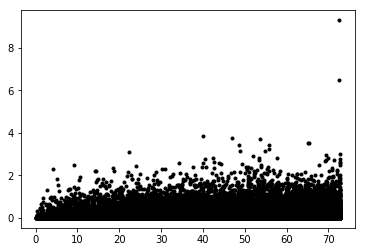

In [11]:
#CHECK: 
figure(1)
plt.plot(fLXeR_cm, fLXeZ_cm, '.k')

In [12]:
#Define CUTS

#Minimum separation for clustering
MINdr_MSSI_cut = (pow(pow(fLXeR_cm - fRFRR_cm,2),.5) > 3.) | (pow(pow(fLXeZ_cm - fRFRZ_cm,2),.5) > 0.2)
MSSI_E_cut = (fLXeEDepER_keV+fRFREDepER_keV+fOD_keV+fSkinEDepER_keV >163.928)

rFid_cut = ( fLXeR_cm<68.8 )
zFid_cut = (fLXeZ_cm>1.5) & (fLXeZ_cm<132.1)

ODcut = (fOD_keV == 0)
Skin_cut = (fSkinEDepER_keV==0)

S1_cuts = (fLXeS1c_phe > 1) | (fRFRS1c_phe > 1)
S2_cuts = (fLXeS2c_phe > 1) #S2 > ? min threshold? 10 or 20?
S1_cut_150 = (fLXeS1c_phe+fRFRS1c_phe < 150)
S1_cut_200 = (fLXeS1c_phe+fRFRS1c_phe < 200)
S1_cut_300 = (fLXeS1c_phe+fRFRS1c_phe < 300)

MSSI_cut = rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts & Skin_cut & ODcut

#CHECK cuts
print "len(R): "+str(len(fLXeR_cm))



print "\nHOW many MSSI events?"
print "len(R[MINdr_MSSI_cut]): "+str(len(fLXeR_cm[MINdr_MSSI_cut]))
print "len(R[MINdr_MSSI_cut & S1_cuts]): "+str(len(fLXeR_cm[MINdr_MSSI_cut & S1_cuts]))
print "len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts]): "+str(len(fLXeR_cm[MINdr_MSSI_cut & S1_cuts & S2_cuts]))    
print "len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & ODcut]): "+str(len(fLXeR_cm[MINdr_MSSI_cut & S1_cuts & S2_cuts & ODcut]))    
print "len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & ODcut & Skin_cut]): "+str(len(fLXeR_cm[MINdr_MSSI_cut & S1_cuts & S2_cuts & ODcut & Skin_cut]))    

print "\n Energy in other volumes?"
print "len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & MSSI_E_cut]): "+str(len(fLXeR_cm[MINdr_MSSI_cut & S1_cuts & S2_cuts & MSSI_E_cut]))
print "len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & rFid_cut & zFid_cut]): "+str(len(fLXeR_cm[MINdr_MSSI_cut & S1_cuts & S2_cuts & rFid_cut & zFid_cut]))
print "len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & rFid_cut & zFid_cut & MSSI_E_cut ]): "+str(len(fLXeR_cm[MINdr_MSSI_cut & S1_cuts & S2_cuts & rFid_cut & zFid_cut & MSSI_E_cut]))



print "\nHOW MANY MSSI EVENTS AFTER ALL CUTS?"
print "len(R[ALL]): "+str(len(fLXeR_cm[rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts]))

print "\n-----\n"
print "len(R) - len(R[rFid_cut]): "+str(len(fLXeR_cm) - len(fLXeR_cm[rFid_cut]))
print "len(R) - len(R[S1_cuts]): "+str(len(fLXeR_cm) - len(fLXeR_cm[S1_cuts]))
print "len(R) - len(R[S2_cuts]): "+str(len(fLXeR_cm) - len(fLXeR_cm[S2_cuts]))

print "\n"
print "len(R[zFid_cut]): "+str(len(fLXeR_cm[zFid_cut]))
print "len(R[rFid_cut & zFid_cut]): "+str(len(fLXeR_cm[rFid_cut & zFid_cut]))

print "\n"
print "len(R[zFid_cut]): "+str(len(fLXeR_cm[zFid_cut]))
print "len(R[rFid_cut & zFid_cut]): "+str(len(fLXeR_cm[rFid_cut & zFid_cut]))

print "\n-----\n"
print "len(R[rFid_cut & zFid_cut & S1_cut_300]): "+str(len(fLXeR_cm[rFid_cut & zFid_cut & S1_cut_300]))
print "len(R[rFid_cut & zFid_cut & S1_cut_200]): "+str(len(fLXeR_cm[rFid_cut & zFid_cut & S1_cut_200]))
print "len(R[rFid_cut & zFid_cut & S1_cut_150]): "+str(len(fLXeR_cm[rFid_cut & zFid_cut & S1_cut_150]))

len(R): 418750

HOW many MSSI events?
len(R[MINdr_MSSI_cut]): 24813
len(R[MINdr_MSSI_cut & S1_cuts]): 24813
len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts]): 24812
len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & ODcut]): 24812
len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & ODcut & Skin_cut]): 24812

 Energy in other volumes?
len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & MSSI_E_cut]): 24701
len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & rFid_cut & zFid_cut]): 264
len(R[MINdr_MSSI_cut & S1_cuts & S2_cuts & rFid_cut & zFid_cut & MSSI_E_cut ]): 264

HOW MANY MSSI EVENTS AFTER ALL CUTS?
len(R[ALL]): 264

-----

len(R) - len(R[rFid_cut]): 44289
len(R) - len(R[S1_cuts]): 0
len(R) - len(R[S2_cuts]): 2


len(R[zFid_cut]): 314
len(R[rFid_cut & zFid_cut]): 264


len(R[zFid_cut]): 314
len(R[rFid_cut & zFid_cut]): 264

-----

len(R[rFid_cut & zFid_cut & S1_cut_300]): 71
len(R[rFid_cut & zFid_cut & S1_cut_200]): 5
len(R[rFid_cut & zFid_cut & S1_cut_150]): 0


# -Get Figures without rFid cut

418750
418750


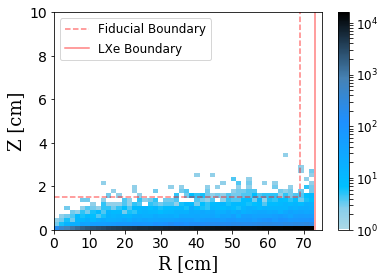

In [13]:
#plot R vs Z
num_bins= 50#339#50

r = linspace(0, 68.8, 2)
z_fid = linspace(132.1, 132.1, 2)
z = linspace(1.5, 132.1, 2)
r_fid = linspace(68.8, 68.8, 2)
z_top = linspace(146.55, 146.55, 2)
z2 = linspace(0, 146.55, 2)
r2 = linspace(0, 73.01, 2)
r_top = linspace(73.01, 73.01, 2)

figure(1)
plt.plot(r, z_fid, '--', c='red', alpha=.5, label='Fiducial Boundary')
plt.plot(r_fid, z, '--', c='red', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='red', alpha=.5)

plt.plot(r2, z_top, '-', c='red', alpha=.5, label='LXe Boundary')
plt.plot(r_top, z2, '-', c='red', alpha=.5)

matplotlib.pyplot.hist2d(fLXeR_cm[S1_cuts & S2_cuts], fLXeZ_cm[S1_cuts & S2_cuts], norm=mpl.colors.LogNorm(), bins=num_bins, cmap=Peters)#, normed=True)

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 75)
plt.ylim(0, 10.0)

cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)
pylab.legend(loc='best', fontsize=12)




print len(fLXeR_cm)
print len(fLXeZ_cm)

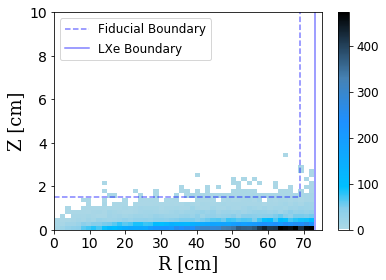

In [14]:
figure(2)
plt.plot(r, z_fid, '--', c='blue', alpha=.5, label='Fiducial Boundary')
plt.plot(r_fid, z, '--', c='blue', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='blue', alpha=.5)

plt.plot(r2, z_top, '-', c='blue', alpha=.5, label='LXe Boundary')
plt.plot(r_top, z2, '-', c='blue', alpha=.5)

matplotlib.pyplot.hist2d(fLXeR_cm[MINdr_MSSI_cut & S1_cuts & S2_cuts], fLXeZ_cm[MINdr_MSSI_cut & S1_cuts & S2_cuts], bins=num_bins, cmap=Peters)#, normed=True)

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 75)
plt.ylim(0, 10.0)

cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)
pylab.legend(loc='best', fontsize=12)

(4.0, 6.0)

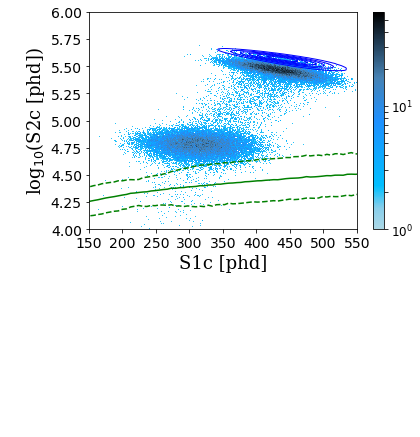

In [15]:
#S1 S2 plot
num_bins= 1000
cuts=S1_cuts & S2_cuts
figure(1)
matplotlib.pyplot.hist2d(fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts], np.log10(fLXeS2c_phe[cuts]), norm=mpl.colors.LogNorm(), bins=num_bins, cmap=Peters)#, normed=True)
plt.plot(NR_S1mean_list, NR_S2mean_list, '-g',label='NR band')
plt.plot(NR_S1mean_list, NR_S2upper_list, '--g')
plt.plot(NR_S1mean_list, NR_S2lower_list, '--g')

plt.xlabel('S1c [phd]',fontsize=18,family='serif')
plt.ylabel('log$_{10}$(S2c [phd])',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.yscale('log')
#plt.ylim(1,1e7)
cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)
contour(counts_sims_lS2,extent=[xbins_sims_lS2.min(),xbins_sims_lS2.max(),ybins_sims_lS2.min(),ybins_sims_lS2.max()],linewidths=1, colors="blue")
plt.xlim(150, 550)
#plt.ylim(4.5, 5.7)
plt.ylim(4.0, 6.0)



/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


S1
min = 75.6876573562622
max = 608.0439987182617

S2
min = 142.9405059814453
max = 505656.875


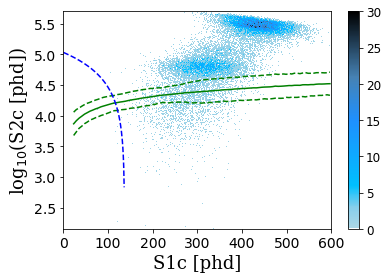

In [16]:
#ALL MSSI EVENTS
num_bins= 250
cuts=MINdr_MSSI_cut & S1_cuts & S2_cuts

x_data = np.arange(0,600, 1)
y_data = (  (25/W) - (x_data/g1)  )*g2

figure(2)
matplotlib.pyplot.hist2d(fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts], np.log10(fLXeS2c_phe[cuts]), bins=num_bins, cmap=Peters)#, normed=True)
plt.plot(NR_S1mean_list, NR_S2mean_list, '-g', label="NR band")
plt.plot(NR_S1mean_list, NR_S2upper_list, '--g')
plt.plot(NR_S1mean_list, NR_S2lower_list, '--g')

plt.plot(x_data, np.log10(y_data), '--b')

plt.xlabel('S1c [phd]',fontsize=18,family='serif')
plt.ylabel('log$_{10}$(S2c [phd])',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)
#contour(counts_sims_lS2,extent=[xbins_sims_lS2.min(),xbins_sims_lS2.max(),ybins_sims_lS2.min(),ybins_sims_lS2.max()],linewidths=1, colors="blue")

plt.xlim(0, 600)
#plt.ylim(2, 6)

print "S1\nmin = "+str(min(fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts]))
print "max = "+str(max(fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts]))

print "\nS2\nmin = "+str(min(fLXeS2c_phe[cuts]) )
print "max = "+str(max(fLXeS2c_phe[cuts]))




#pylab.legend(loc='best', fontsize=12)

In [17]:
#What is WIMP search ROI in S1 space for this g1, g2 and Efield?
t=136.8613
#for i in range(120,140):
#    print str(x_data[i])+"\t"+str(y_data[i])
print str(t)+"\t"+str(   (  (25/W)-(t/g1)  )*g2   )




136.8613	0.0109469586503


(51,)
[5.82767896e-08 1.86093750e-01 3.72187442e-01 5.58281133e-01
 7.44374825e-01 9.30468516e-01 1.11656221e+00 1.30265590e+00
 1.48874959e+00 1.67484328e+00 1.86093697e+00 2.04703067e+00
 2.23312436e+00 2.41921805e+00 2.60531174e+00 2.79140543e+00
 2.97749912e+00 3.16359282e+00 3.34968651e+00 3.53578020e+00
 3.72187389e+00 3.90796758e+00 4.09406127e+00 4.28015497e+00
 4.46624866e+00 4.65234235e+00 4.83843604e+00 5.02452973e+00
 5.21062342e+00 5.39671712e+00 5.58281081e+00 5.76890450e+00
 5.95499819e+00 6.14109188e+00 6.32718557e+00 6.51327926e+00
 6.69937296e+00 6.88546665e+00 7.07156034e+00 7.25765403e+00
 7.44374772e+00 7.62984141e+00 7.81593511e+00 8.00202880e+00
 8.18812249e+00 8.37421618e+00 8.56030987e+00 8.74640356e+00
 8.93249726e+00 9.11859095e+00 9.30468464e+00]
(50,)
[4.06362e+05 6.67900e+03 2.38000e+03 1.30900e+03 8.06000e+02 4.49000e+02
 2.80000e+02 1.58000e+02 1.30000e+02 6.70000e+01 3.70000e+01 3.30000e+01
 2.00000e+01 1.20000e+01 8.00000e+00 6.00000e+00 3.00000e+00 2.

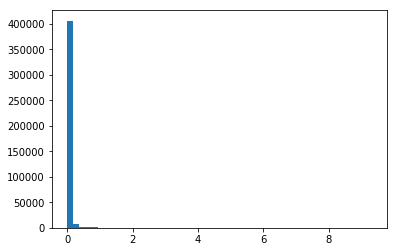

In [18]:
#Inspect initial histogram
num_bins =  50#1000#13500#20
#(full_n, full_bins, full_patches) = plt.hist(Full_Reduced_R_list, bins=num_bins)
(n, bins, patches) = plt.hist(fLXeZ_cm, bins=num_bins)

#Get bin mids
print bins.shape
print bins

bin_mids_list = []
for i in range(1, len(bins)):
    bin_mids_list.append( (bins[i] + bins[i-1])/2 )
    
this_half_bid_width = .5*(bin_mids_list[1] - bin_mids_list[0])

#print bin_mids_list[-1]
#print bin_mids_list[-1]+this_half_bid_width
#print bin_mids_list[-1]-this_half_bid_width


#Remove bins with n>10, & remove top bin
print n.shape
print n
print "\n"

counter = 0
new_bin_mids_list = []
new_n_list = []
for i in range(0, len(n)):
    #if n[i] < 50 or n[i] > 15000:
    #print( str(i)+": ("+str(bin_mids_list[i])+", "+str(n[i])+")" )
    #counter +=1
    #else:
    new_bin_mids_list.append(bin_mids_list[i])
    new_n_list.append(n[i])
"""
new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]

new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]

new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]

new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]

new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]
"""
print("\n\tcount = "+str(counter)+" / "+str(len(n)))



In [19]:
#Inspect bins
print "bin_mids\t bin_count"
for i in range(0,len(bin_mids_list)):
    print str(bin_mids_list[i])+"\t"+str(n[i])


bin_mids	 bin_count
0.09304690408379222	406362.0
0.2791405956977974	6679.0
0.4652342873118026	2380.0
0.6513279789258078	1309.0
0.8374216705398131	806.0
1.0235153621538182	449.0
1.2096090537678235	280.0
1.3957027453818287	158.0
1.581796436995834	130.0
1.7678901286098392	67.0
1.9539838202238444	37.0
2.1400775118378492	33.0
2.326171203451855	20.0
2.5122648950658597	12.0
2.6983585866798654	8.0
2.88445227829387	6.0
3.070545969907876	3.0
3.2566396615218807	2.0
3.4427333531358864	4.0
3.628827044749891	0.0
3.814920736363897	3.0
4.001014427977902	0.0
4.187108119591906	0.0
4.373201811205912	0.0
4.559295502819918	0.0
4.745389194433923	0.0
4.931482886047927	0.0
5.117576577661933	0.0
5.303670269275939	0.0
5.489763960889944	0.0
5.675857652503948	0.0
5.861951344117954	0.0
6.048045035731959	0.0
6.2341387273459645	0.0
6.420232418959969	1.0
6.606326110573974	0.0
6.79241980218798	0.0
6.9785134938019855	0.0
7.16460718541599	0.0
7.350700877029995	0.0
7.536794568644001	0.0
7.7228882602580065	0.0
7.908981951

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06, 1.e+07]), <a list of 10 Text yticklabel objects>)

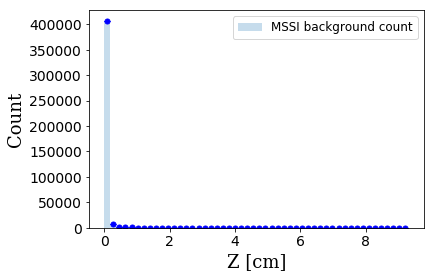

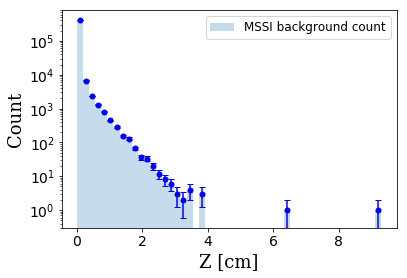

In [20]:
#R plot
#num_bins=20
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

ax.hist(fLXeZ_cm, bins=num_bins, alpha=0.25, label='MSSI background count')
ax.plot(bin_mids_list, n, ".b", markersize='10')
#ax.errorbar(bin_mids_list, np.asarray(n), 1./pow(np.asarray(n),.5), ecolor='blue', capsize=3, fmt=' ')
ax.errorbar(bin_mids_list, np.asarray(n), pow(np.asarray(n),.5), ecolor='blue', capsize=3, fmt=' ')
#ax.plot(new_bin_mids_list,  new_n_list, 'xk', markersize='10', label="Bin used in fit")
pylab.legend(loc='best', fontsize=12)
#ax.set_yscale('log')
#plt.xlim(68, 72.625)
#plt.ylim(0, 11000)


plt.xlabel('Z [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig = plt.figure(2)
ax = fig.add_subplot(1, 1, 1)

ax.hist(fLXeZ_cm, bins=num_bins, alpha=0.25, label='MSSI background count')
ax.plot(bin_mids_list, n, ".b", markersize='10')
#ax.errorbar(bin_mids_list, np.asarray(n), 1./pow(np.asarray(n),.5), ecolor='blue', capsize=3, fmt=' ')
ax.errorbar(bin_mids_list, np.asarray(n), pow(np.asarray(n),.5), ecolor='blue', capsize=3, fmt=' ')
#ax.plot(new_bin_mids_list,  new_n_list, 'xk', markersize='10', label="Bin used in fit")
pylab.legend(loc='best', fontsize=12)
#ax.set_yscale('log')
#plt.xlim(68, 72.625)
#plt.ylim(.1, 11000)

plt.xlabel('Z [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# -Get figures with rFiducial cut

418750
418750


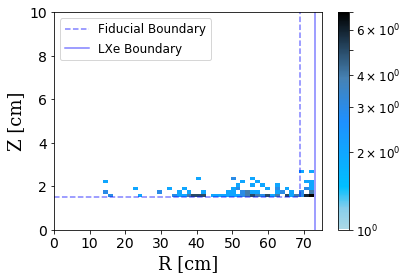

In [21]:
#plot R vs Z
num_bins= 50#339#50

r = linspace(0, 68.8, 2)
z_fid = linspace(132.1, 132.1, 2)
z = linspace(1.5, 132.1, 2)
r_fid = linspace(68.8, 68.8, 2)
z_top = linspace(146.55, 146.55, 2)
z2 = linspace(0, 146.55, 2)
r2 = linspace(0, 73.01, 2)
r_top = linspace(73.01, 73.01, 2)

figure(1)
plt.plot(r, z_fid, '--', c='blue', alpha=.5, label='Fiducial Boundary')
plt.plot(r_fid, z, '--', c='blue', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='blue', alpha=.5)

plt.plot(r2, z_top, '-', c='blue', alpha=.5, label='LXe Boundary')
plt.plot(r_top, z2, '-', c='blue', alpha=.5)

matplotlib.pyplot.hist2d(fLXeR_cm[zFid_cut], fLXeZ_cm[zFid_cut], norm=mpl.colors.LogNorm(), bins=num_bins, cmap=Peters)#, normed=True)

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 75)
plt.ylim(0, 10.0)

cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)
pylab.legend(loc='best', fontsize=12)



print len(fLXeR_cm)
print len(fLXeZ_cm)



max(fLXeZ_cm[cuts]): 9.30468463897705


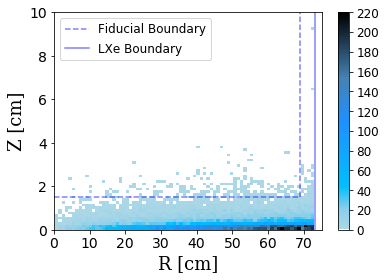

In [22]:
#plot R vs Z
num_bins= 77#339#50
cuts=MINdr_MSSI_cut & S1_cuts & S2_cuts

figure(2)
plt.plot(r, z_fid, '--', c='blue', alpha=.5, label='Fiducial Boundary')
plt.plot(r_fid, z, '--', c='blue', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='blue', alpha=.5)

plt.plot(r2, z_top, '-', c='blue', alpha=.5, label='LXe Boundary')
plt.plot(r_top, z2, '-', c='blue', alpha=.5)

matplotlib.pyplot.hist2d(fLXeR_cm[cuts], fLXeZ_cm[cuts], bins=num_bins, cmap=Peters)#, normed=True)

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 75)
plt.ylim(0, 10)

#cb=plt.colorbar()
cb=plt.colorbar(ticks=[0,20,40,60,80,100,120,140,160,180,200,220])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)
pylab.legend(loc='best', fontsize=12)

print "max(fLXeZ_cm[cuts]): "+str(max(fLXeZ_cm[cuts]))

Z FID CUT


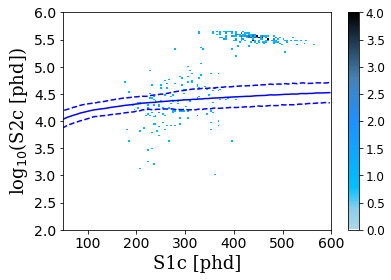

In [23]:
#S1 S2 plot
num_bins= 100
cuts=zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts

print "Z FID CUT"

figure(2)
matplotlib.pyplot.hist2d(fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts], np.log10(fLXeS2c_phe[cuts]), bins=num_bins, cmap=Peters)#, normed=True)

plt.plot(NR_S1mean_list, NR_S2mean_list, '-b')
plt.plot(NR_S1mean_list, NR_S2upper_list, '--b')
plt.plot(NR_S1mean_list, NR_S2lower_list, '--b')

plt.xlabel('S1c [phd]',fontsize=18,family='serif')
plt.ylabel('log$_{10}$(S2c [phd])',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(50, 600)
plt.ylim(2, 6)

cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)





#pylab.legend(loc='best', fontsize=12)

In [24]:
cuts = rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts
print "S1\nmin = "+str(min(fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts]))
print "max = "+str(max(fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts]))

print "\nS2\nmin = "+str(min(fLXeS2c_phe[cuts]) )
print "max = "+str(max(fLXeS2c_phe[cuts]))

S1
min = 174.16943740844727
max = 566.2296905517578

S2
min = 1001.3238525390625
max = 435216.0


(51,)
[1.10384593e-04 7.69794576e-02 1.53848531e-01 2.30717604e-01
 3.07586677e-01 3.84455749e-01 4.61324822e-01 5.38193895e-01
 6.15062968e-01 6.91932041e-01 7.68801114e-01 8.45670187e-01
 9.22539260e-01 9.99408333e-01 1.07627741e+00 1.15314648e+00
 1.23001555e+00 1.30688463e+00 1.38375370e+00 1.46062277e+00
 1.53749184e+00 1.61436092e+00 1.69122999e+00 1.76809906e+00
 1.84496814e+00 1.92183721e+00 1.99870628e+00 2.07557536e+00
 2.15244443e+00 2.22931350e+00 2.30618257e+00 2.38305165e+00
 2.45992072e+00 2.53678979e+00 2.61365887e+00 2.69052794e+00
 2.76739701e+00 2.84426608e+00 2.92113516e+00 2.99800423e+00
 3.07487330e+00 3.15174238e+00 3.22861145e+00 3.30548052e+00
 3.38234960e+00 3.45921867e+00 3.53608774e+00 3.61295681e+00
 3.68982589e+00 3.76669496e+00 3.84356403e+00]
(50,)
[4.637e+03 4.685e+03 4.329e+03 2.262e+03 1.442e+03 1.020e+03 7.630e+02
 5.960e+02 4.910e+02 3.620e+02 3.130e+02 2.580e+02 1.830e+02 1.540e+02
 1.340e+02 1.000e+02 8.400e+01 7.100e+01 4.800e+01 5.500e+01 5.300e

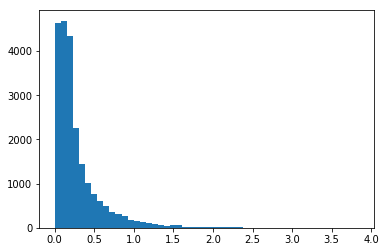

In [25]:
#Inspect initial histogram
num_bins =  50#1000#13500#20
cuts=rFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts
#(full_n, full_bins, full_patches) = plt.hist(Full_Reduced_R_list, bins=num_bins)
(n, bins, patches) = plt.hist(fLXeZ_cm[cuts], bins=num_bins)

#Get bin mids
print bins.shape
print bins

bin_mids_list = []
for i in range(1, len(bins)):
    bin_mids_list.append( (bins[i] + bins[i-1])/2 )
    
this_half_bid_width = .5*(bin_mids_list[1] - bin_mids_list[0])

#print bin_mids_list[-1]
#print bin_mids_list[-1]+this_half_bid_width
#print bin_mids_list[-1]-this_half_bid_width


#Remove bins with n>10, & remove top bin
print n.shape
print n
print "\n"

counter = 0
new_bin_mids_list = []
new_n_list = []
for i in range(0, len(n)):
    #if n[i] < 50 or n[i] > 15000:
    #print( str(i)+": ("+str(bin_mids_list[i])+", "+str(n[i])+")" )
    #counter +=1
    #else:
    new_bin_mids_list.append(bin_mids_list[i])
    new_n_list.append(n[i])
"""
new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]

new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]

new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]

new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]

new_bin_mids_list = new_bin_mids_list[:-1]
new_n_list =new_n_list[:-1]
"""
print("\n\tcount = "+str(counter)+" / "+str(len(n)))




In [26]:
#Inspect bins
print "bin_mids\t bin_count"
for i in range(0,len(bin_mids_list)):
    print str(bin_mids_list[i])+"\t"+str(n[i])



bin_mids	 bin_count
0.038544921082575456	4637.0
0.11541399406087294	4685.0
0.19228306703917042	4329.0
0.2691521400174679	2262.0
0.3460212129957654	1442.0
0.42289028597406286	1020.0
0.49975935895236034	763.0
0.5766284319306578	596.0
0.6534975049089553	491.0
0.7303665778872528	362.0
0.8072356508655503	313.0
0.8841047238438478	258.0
0.9609737968221452	183.0
1.0378428698004427	154.0
1.1147119427787402	134.0
1.1915810157570377	100.0
1.2684500887353352	84.0
1.3453191617136326	71.0
1.4221882346919301	48.0
1.4990573076702276	55.0
1.575926380648525	53.0
1.6527954536268226	29.0
1.72966452660512	28.0
1.8065335995834175	26.0
1.883402672561715	11.0
1.9602717455400125	12.0
2.03714081851831	16.0
2.1140098914966075	12.0
2.190878964474905	11.0
2.2677480374532024	7.0
2.3446171104315	7.0
2.4214861834097974	5.0
2.498355256388095	3.0
2.5752243293663923	5.0
2.65209340234469	1.0
2.7289624753229873	2.0
2.805831548301285	3.0
2.8827006212795823	1.0
2.9595696942578797	0.0
3.0364387672361772	0.0
3.113307840214474

max(fLXeZ_cm[cuts]): 3.843564033508301


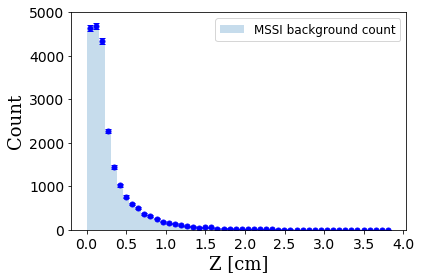

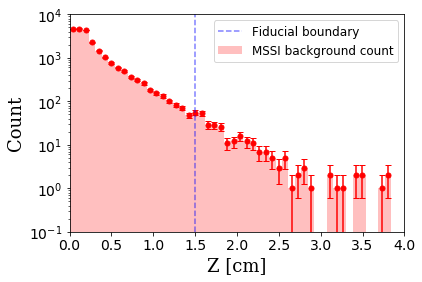

In [27]:
#R plot
#num_bins=20
cuts=rFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts

fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

ax.hist(fLXeZ_cm[cuts], bins=num_bins, alpha=0.25, label='MSSI background count')
ax.plot(bin_mids_list, n, ".b", markersize='10')
#ax.errorbar(bin_mids_list, np.asarray(n), 1./pow(np.asarray(n),.5), ecolor='blue', capsize=3, fmt=' ')
ax.errorbar(bin_mids_list, np.asarray(n), pow(np.asarray(n),.5), ecolor='blue', capsize=3, fmt=' ')
#ax.plot(new_bin_mids_list,  new_n_list, 'xk', markersize='10', label="Bin used in fit")
pylab.legend(loc='best', fontsize=12)
#ax.set_yscale('log')
#plt.xlim(68, 72.625)
#plt.ylim(0, 11000)


plt.xlabel('Z [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig = plt.figure(2)
ax = fig.add_subplot(1, 1, 1)

ax.hist(fLXeZ_cm[cuts], bins=num_bins, alpha=0.25, color='red',label='MSSI background count')
ax.plot(bin_mids_list, n, ".r", markersize='10')
ax.errorbar(bin_mids_list, np.asarray(n), pow(np.asarray(n),.5), ecolor='red', capsize=3, fmt=' ')
plt.plot([1.5,1.5], [.1,1e4], '--', c='blue', alpha=.5, label='Fiducial boundary')
pylab.legend(loc='best', fontsize=12)
plt.xlim(0,4)
plt.ylim(.1, 1e4)

plt.xlabel('Z [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


print "max(fLXeZ_cm[cuts]): "+str(max(fLXeZ_cm[cuts]))

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text yticklabel objects>)

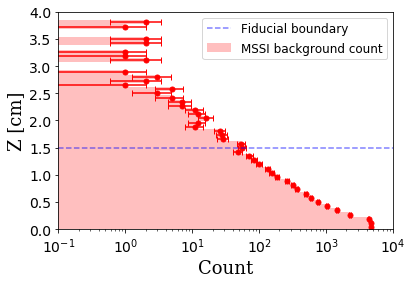

In [28]:
fig = plt.figure(2)
ax = fig.add_subplot(1, 1, 1)

ax.hist(fLXeZ_cm[cuts], bins=num_bins, alpha=0.25, color='red', orientation="horizontal" ,label='MSSI background count')
ax.plot(n, bin_mids_list,".r", markersize='10')
ax.errorbar(np.asarray(n), bin_mids_list, xerr=pow(np.asarray(n),.5), ecolor='red', capsize=3, fmt=' ')
plt.plot([.1,1e4], [1.5,1.5], '--', c='blue', alpha=.5, label='Fiducial boundary')
pylab.legend(loc='best', fontsize=12)
plt.ylim(0,4)
plt.xlim(.1, 1e4)

plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xlabel('Count',fontsize=18,family='serif')
plt.xscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# -Plot with ALL cuts

418750
418750


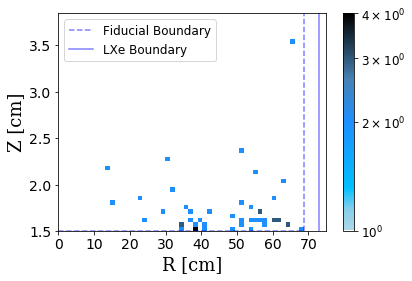

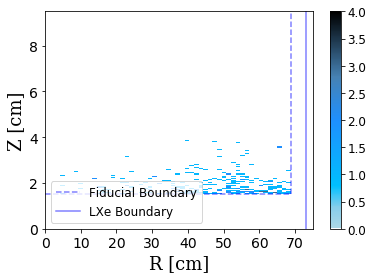

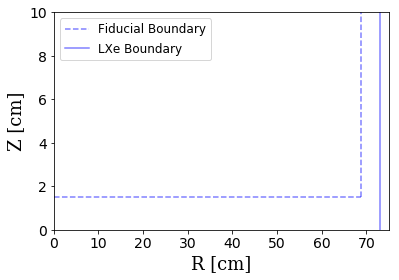

In [29]:
#plot R vs Z
num_bins= 50#339#50

r = linspace(0, 68.8, 2)
z_fid = linspace(132.1, 132.1, 2)
z = linspace(1.5, 132.1, 2)
r_fid = linspace(68.8, 68.8, 2)
z_top = linspace(146.55, 146.55, 2)
z2 = linspace(0, 146.55, 2)
r2 = linspace(0, 73.01, 2)
r_top = linspace(73.01, 73.01, 2)

cuts = rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts
S1_NR_list, S2_NR_list, R_NR_list, Z_NR_list = NRband_cut( fLXeR_cm[cuts], fLXeZ_cm[cuts], fLXeR_cm[cuts], fLXeZ_cm[cuts] )

figure(1)
plt.plot(r, z_fid, '--', c='blue', alpha=.5, label='Fiducial Boundary')
plt.plot(r_fid, z, '--', c='blue', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='blue', alpha=.5)

plt.plot(r2, z_top, '-', c='blue', alpha=.5, label='LXe Boundary')
plt.plot(r_top, z2, '-', c='blue', alpha=.5)

matplotlib.pyplot.hist2d(fLXeR_cm[rFid_cut & zFid_cut], fLXeZ_cm[rFid_cut & zFid_cut], norm=mpl.colors.LogNorm(), bins=num_bins, cmap=Peters)#, normed=True)

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 75)
#plt.ylim(0, 10.0)

cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)
pylab.legend(loc='best', fontsize=12)

cuts = rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts
S1_NR_list, S2_NR_list, R_NR_list, Z_NR_list = NRband_cut( fLXeR_cm[cuts], fLXeZ_cm[cuts], fLXeR_cm[cuts], fLXeZ_cm[cuts] )

figure(2)
plt.plot(r, z_fid, '--', c='blue', alpha=.5, label='Fiducial Boundary')
plt.plot(r_fid, z, '--', c='blue', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='blue', alpha=.5)

plt.plot(r2, z_top, '-', c='blue', alpha=.5, label='LXe Boundary')
plt.plot(r_top, z2, '-', c='blue', alpha=.5)

matplotlib.pyplot.hist2d(fLXeR_cm[rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts], fLXeZ_cm[rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts], bins=num_bins, cmap=Peters)#, normed=True)

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 75)
plt.ylim(0, 9.5)

cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)
pylab.legend(loc='lower left', fontsize=12)

cuts = rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts
S1_NR_list, S2_NR_list, R_NR_list, Z_NR_list = NRband_cut( fLXeR_cm[cuts], fLXeZ_cm[cuts], fLXeR_cm[cuts], fLXeZ_cm[cuts] )

figure(3)
plt.plot(r, z_fid, '--', c='blue', alpha=.5, label='Fiducial Boundary')
plt.plot(r_fid, z, '--', c='blue', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='blue', alpha=.5)

plt.plot(r2, z_top, '-', c='blue', alpha=.5, label='LXe Boundary')
plt.plot(r_top, z2, '-', c='blue', alpha=.5)
#plt.plot(fLXeR_cm[cuts], fLXeZ_cm[cuts], '.k')
plt.plot(R_NR_list, Z_NR_list, '.k', alpha=.8)

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 75)
plt.ylim(0, 10.0)

pylab.legend(loc='best', fontsize=12)



print len(fLXeR_cm)
print len(fLXeZ_cm)

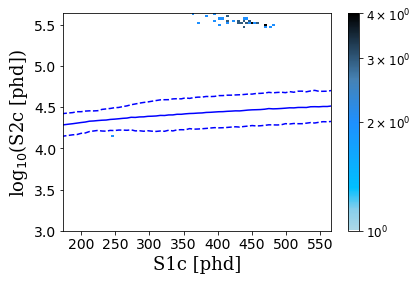

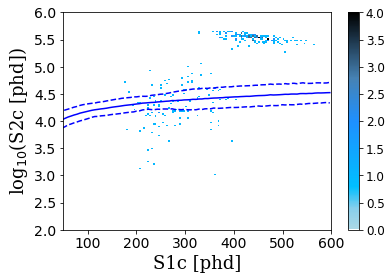

In [30]:
#S1 S2 plot
num_bins= 100

figure(1)
matplotlib.pyplot.hist2d(fLXeS1c_phe[rFid_cut & zFid_cut & S1_cuts & S2_cuts]+fRFRS1c_phe[rFid_cut & zFid_cut & S1_cuts & S2_cuts], np.log10(fLXeS2c_phe[rFid_cut & zFid_cut & S1_cuts & S2_cuts]), norm=mpl.colors.LogNorm(), bins=num_bins, cmap=Peters)#, normed=True)
plt.plot(NR_S1mean_list, NR_S2mean_list, '-b')
plt.plot(NR_S1mean_list, NR_S2upper_list, '--b')
plt.plot(NR_S1mean_list, NR_S2lower_list, '--b')

plt.xlabel('S1c [phd]',fontsize=18,family='serif')
plt.ylabel('log$_{10}$(S2c [phd])',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)

figure(2)
matplotlib.pyplot.hist2d(fLXeS1c_phe[MSSI_cut]+fRFRS1c_phe[MSSI_cut], np.log10(fLXeS2c_phe[MSSI_cut]), bins=num_bins, cmap=Peters)#, normed=True)
plt.plot(NR_S1mean_list, NR_S2mean_list, '-b')
plt.plot(NR_S1mean_list, NR_S2upper_list, '--b')
plt.plot(NR_S1mean_list, NR_S2lower_list, '--b')

plt.xlabel('S1c [phd]',fontsize=18,family='serif')
plt.ylabel('log$_{10}$(S2c [phd])',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(50,600)
plt.ylim(2,6)

cb=plt.colorbar()
#cb=plt.colorbar(ticks=[3.05e-5, 1.71e-4, 9.60e-4, 5.39e-3, 3.02e-2])
#cb.ax.set_yticklabels(['3.05e-5', '1.71e-4', '9.60e-4', '5.39e-3', '3.02e-2']) 

cb.ax.tick_params(labelsize=12)



/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10


MSSI events = 24812
MSSI events in EFT ROI = 5802
MSSI events in EFT ROI & NR band = 29


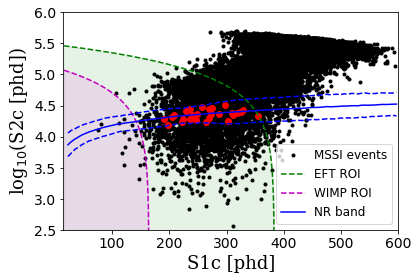

In [31]:
#aaaaa
WS_ROI_cut = (fLXeS2c_phe<( (30./W) - ( (fLXeS1c_phe+fRFRS1c_phe) /g1) )*g2)
EFT_ROI_cut = (fLXeS2c_phe<( (Emax/W) - ( (fLXeS1c_phe+fRFRS1c_phe) /g1) )*g2)



cuts=  MINdr_MSSI_cut & S1_cuts & S2_cuts & rFid_cut & zFid_cut &EFT_ROI_cut#& (fLXeS1c_phe+fRFRS1c_phe<600)
cuts2= MINdr_MSSI_cut & S1_cuts & S2_cuts 
S1_temp_NR_list, S2_temp_NR_list, R_temp_NR_list, Z_temp_NR_list = NRband_cut( fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts], fLXeS2c_phe[cuts], fLXeR_cm[cuts], fLXeZ_cm[cuts] )
#S1_temp_NR_list, S2_temp_NR_list, R_temp_NR_list, Z_temp_NR_list = fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts], fLXeS2c_phe[cuts], fLXeR_cm[cuts], fLXeZ_cm[cuts] 
ymin=2.5
S1_NR_list = []
S2_NR_list = []
R_NR_list = []
Z_NR_list = []
for i in range(0,len(S1_temp_NR_list)):
    if S1_temp_NR_list[i] > 370:#S1max:
        continue
    elif S2_temp_NR_list[i] > ( (Emax/W) - (S1_temp_NR_list[i]/g1) )*g2:
        continue
    else:
        S1_NR_list.append(S1_temp_NR_list[i])
        S2_NR_list.append(S2_temp_NR_list[i])
        R_NR_list.append(R_temp_NR_list[i])
        Z_NR_list.append(Z_temp_NR_list[i])

x_data=np.arange(16,400,.1)
y_data= ( (Emax/W) - (x_data/g1) )*g2
y_data2=( (30./W) - (x_data/g1) )*g2
y_data3=( (163.93/W) - (x_data/g1) )*g2

y_data_bot= (x_data/x_data)*ymin

#print "len(S1_NR_list): "+str(len(S1_NR_list))

figure(3)
plt.fill_between(x_data, y_data_bot, np.log10(y_data2), color='magenta', alpha='0.1')
plt.fill_between(x_data, y_data_bot, np.log10(y_data), color='green', alpha='0.1')


plt.plot(fLXeS1c_phe[cuts2]+fRFRS1c_phe[cuts2], np.log10(fLXeS2c_phe[cuts2]), '.k', label='MSSI events')
plt.plot(S1_NR_list, np.log10(np.asarray(S2_NR_list)), 'or')
plt.plot(x_data, np.log10(y_data), '--g', label='EFT ROI')
plt.plot(x_data, np.log10(y_data2), '--m', label='WIMP ROI')


#plt.plot(x_data, np.log10(y_data3), '--r', label='Xe131m energy')
plt.xlabel('S1c [phd]',fontsize=18,family='serif')
plt.ylabel('log$_{10}$(S2c [phd])',fontsize=18,family='serif')

plt.plot(NR_S1mean_list, NR_S2mean_list, '-b', label='NR band')
plt.plot(NR_S1mean_list, NR_S2upper_list, '--b')
plt.plot(NR_S1mean_list, NR_S2lower_list, '--b')


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
pylab.legend(loc='best', fontsize=12)

plt.xlim(15,600)
plt.ylim(ymin, 6)

print "MSSI events = "+str(len(fLXeS1c_phe[cuts2]) )
print "MSSI events in EFT ROI = "+str(len(fLXeS1c_phe[cuts2 & EFT_ROI_cut ]))
print "MSSI events in EFT ROI & NR band = "+str(len(S1_NR_list))


In [32]:
#WS cuts
print "\nWS"
cuts= MINdr_MSSI_cut & S1_cuts & S2_cuts
print "Tot: "+str(int(len(fLXeS1c_phe[cuts])*1.001613352))
cuts=MINdr_MSSI_cut & S1_cuts & S2_cuts & (fLXeS2c_phe<( (30./W) - ( (fLXeS1c_phe+fRFRS1c_phe) /g1) )*g2)
print "ROI: "+str(int(len(fLXeS1c_phe[cuts])*1.001613352))
print "ROI+SS: "+str(len(fLXeS1c_phe[cuts]))
print "ROI+SS+OD: "+str(len(fLXeS1c_phe[cuts & ODcut]))
print "ROI+SS+OD+Skin: "+str(len(fLXeS1c_phe[cuts & ODcut & Skin_cut]))
print "ROI+SS+OD+Skin+Fid: "+str(len(fLXeS1c_phe[cuts & ODcut & Skin_cut & rFid_cut & zFid_cut]))



#EFT cuts
print "\nEFT"
cuts= MINdr_MSSI_cut & S1_cuts & S2_cuts
print "Tot: "+str(int(len(fLXeS1c_phe[cuts])*1.001613352))
cuts=MINdr_MSSI_cut & S1_cuts & S2_cuts & (fLXeS2c_phe<( (Emax/W) - ( (fLXeS1c_phe+fRFRS1c_phe) /g1) )*g2)
print "ROI: "+str(int(len(fLXeS1c_phe[cuts])*1.001613352))
print "ROI+SS: "+str(len(fLXeS1c_phe[cuts]))
print "ROI+SS+OD: "+str(len(fLXeS1c_phe[cuts & ODcut]))
print "ROI+SS+OD+Skin: "+str(len(fLXeS1c_phe[cuts & ODcut & Skin_cut]))
print "ROI+SS+OD+Skin+Fid: "+str(len(fLXeS1c_phe[cuts & ODcut & Skin_cut & rFid_cut & zFid_cut]))




WS
Tot: 24852
ROI: 19
ROI+SS: 19
ROI+SS+OD: 19
ROI+SS+OD+Skin: 19
ROI+SS+OD+Skin+Fid: 0

EFT
Tot: 24852
ROI: 5811
ROI+SS: 5802
ROI+SS+OD: 5802
ROI+SS+OD+Skin: 5802
ROI+SS+OD+Skin+Fid: 93


# -Do MSSI events have energy depositions outside of FFR or RFR?

155
155

MINIMUM COMBINED ENERGY DEPOSITIONS
12.727223873138428


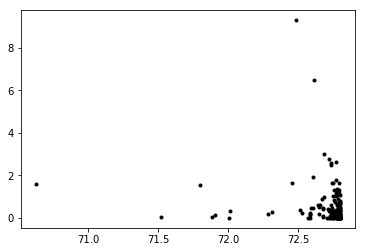

In [33]:
MSSI_cut = rFid_cut & zFid_cut & MINdr_MSSI_cut & S1_cuts & S2_cuts
cuts = (fRFREDepER_keV + fLXeEDepER_keV < 163.9)

print len(fRFREDepER_keV[cuts])
print len(fLXeEDepER_keV[cuts])

#print "fRFREDepER_keV[cuts] + fLXeEDepER_keV[cuts]"
#for i in range(0, len(fRFREDepER_keV[cuts])):
#    #if fRFRR_cm[i]>72.79 and fLXeR_cm[cuts][i]==72.48579406738281:
#    print str(fRFREDepER_keV[cuts][i])+" + "+str(fLXeEDepER_keV[cuts][i])+" = "+str(fRFREDepER_keV[cuts][i] + fLXeEDepER_keV[cuts][i])     
    
    
print "\nMINIMUM COMBINED ENERGY DEPOSITIONS" 
print min( fRFREDepER_keV[cuts] + fLXeEDepER_keV[cuts] )  

plt.plot(fLXeR_cm[cuts], fLXeZ_cm[cuts], '.k')

Param	RFR			LXe
R_cm:	72.79222106933594	72.48579406738281
Z_cm:	-1.6176164150238037	9.30468463897705
E_dep:	90.77811431884766	45.42805099487305


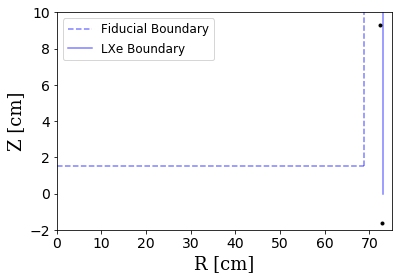

In [34]:
#Deep MSSI events
cuts = (fLXeZ_cm > 8)
figure(3)
plt.plot(r, z_fid, '--', c='blue', alpha=.5, label='Fiducial Boundary')
plt.plot(r_fid, z, '--', c='blue', alpha=.5)
plt.plot([0,68.8], [1.5,1.5], '--', c='blue', alpha=.5)

plt.plot(r2, z_top, '-', c='blue', alpha=.5, label='LXe Boundary')
plt.plot(r_top, z2, '-', c='blue', alpha=.5)
plt.plot(fLXeR_cm[cuts], fLXeZ_cm[cuts], '.k')
plt.plot(fRFRR_cm[cuts], fRFRZ_cm[cuts], '.k')

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 75)
plt.ylim(-2, 10.0)

pylab.legend(loc='best', fontsize=12)

print "Param\tRFR\t\t\tLXe"
print "R_cm:\t"+str(fRFRR_cm[cuts][0])+"\t"+str(fLXeR_cm[cuts][0])
print "Z_cm:\t"+str(fRFRZ_cm[cuts][0])+"\t"+str(fLXeZ_cm[cuts][0])
print "E_dep:\t"+str(fRFREDepER_keV[cuts][0])+"\t"+str(fLXeEDepER_keV[cuts][0])

In [35]:
print len(fSkinEDepER_keV)
print len(fSkinEDepER_keV[fSkinEDepER_keV>0])
print len(fSkinEDepER_keV[fOD_keV>0])

418750
1
0


In [36]:
print fSkinEDepER_keV[fSkinEDepER_keV>0]

[151.20277405]


In [37]:
print len(NR_S2mean_list)

95


len(fLXeS1c_phe[cuts2]): 24812


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


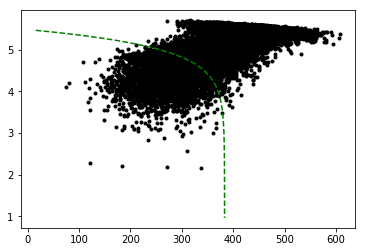

In [38]:
#WTF is going on
x_data=np.arange(16,400,.1)
y_data= ( (Emax/W) - (x_data/g1) )*g2

cuts2= MINdr_MSSI_cut & S1_cuts & S2_cuts# & WS_ROI_cut

figure(1)
plt.plot(fLXeS1c_phe[cuts2]+fRFRS1c_phe[cuts2], np.log10(fLXeS2c_phe[cuts2]), '.k', label='MSSI events')
plt.plot(x_data, np.log10(y_data), '--g', label='EFT ROI')

print "len(fLXeS1c_phe[cuts2]): "+str(len(fLXeS1c_phe[cuts2]))

/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10
/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in log10


MSSI events = 24812
MSSI events in EFT ROI = 5802
MSSI events in EFT ROI & NR band = 29


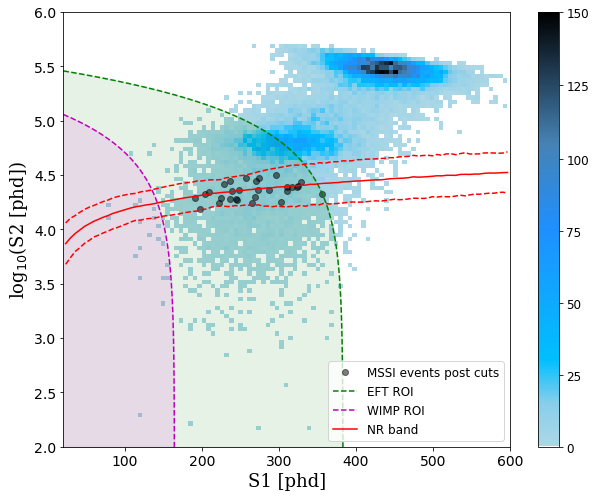

In [41]:
#aaaaa
num_bins= 90
#num_bins= 70#339#50

WS_ROI_cut = (fLXeS2c_phe<( (30./W) - ( (fLXeS1c_phe+fRFRS1c_phe) /g1) )*g2)
EFT_ROI_cut = (fLXeS2c_phe<( (Emax/W) - ( (fLXeS1c_phe+fRFRS1c_phe) /g1) )*g2)



cuts=  MINdr_MSSI_cut & S1_cuts & S2_cuts & rFid_cut & zFid_cut &EFT_ROI_cut#& (fLXeS1c_phe+fRFRS1c_phe<600)
cuts2= MINdr_MSSI_cut & S1_cuts & S2_cuts 
S1_temp_NR_list, S2_temp_NR_list, R_temp_NR_list, Z_temp_NR_list = NRband_cut( fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts], fLXeS2c_phe[cuts], fLXeR_cm[cuts], fLXeZ_cm[cuts] )
#S1_temp_NR_list, S2_temp_NR_list, R_temp_NR_list, Z_temp_NR_list = fLXeS1c_phe[cuts]+fRFRS1c_phe[cuts], fLXeS2c_phe[cuts], fLXeR_cm[cuts], fLXeZ_cm[cuts] 
ymin=2.0
S1_NR_list = []
S2_NR_list = []
R_NR_list = []
Z_NR_list = []
for i in range(0,len(S1_temp_NR_list)):
    if S1_temp_NR_list[i] > 370:#S1max:
        continue
    elif S2_temp_NR_list[i] > ( (Emax/W) - (S1_temp_NR_list[i]/g1) )*g2:
        continue
    else:
        S1_NR_list.append(S1_temp_NR_list[i])
        S2_NR_list.append(S2_temp_NR_list[i])
        R_NR_list.append(R_temp_NR_list[i])
        Z_NR_list.append(Z_temp_NR_list[i])

x_data=np.arange(16,400,.1)
y_data= ( (Emax/W) - (x_data/g1) )*g2
y_data2=( (30./W) - (x_data/g1) )*g2
y_data3=( (163.93/W) - (x_data/g1) )*g2

y_data_bot= (x_data/x_data)*ymin

#print "len(S1_NR_list): "+str(len(S1_NR_list))

figure(3)
plt.fill_between(x_data, y_data_bot, np.log10(y_data2), color='magenta', alpha='0.1')
plt.fill_between(x_data, y_data_bot, np.log10(y_data), color='green', alpha='0.1')

matplotlib.pyplot.hist2d(fLXeS1c_phe[cuts2]+fRFRS1c_phe[cuts2], np.log10(fLXeS2c_phe[cuts2]), bins=num_bins, cmap=Peters, label='All MSSI events')#, normed=True)
#plt.plot(fLXeS1c_phe[cuts2]+fRFRS1c_phe[cuts2], np.log10(fLXeS2c_phe[cuts2]), '.k', label='MSSI events')
plt.plot(S1_NR_list, np.log10(np.asarray(S2_NR_list)), 'ok', alpha=.5,label='MSSI events post cuts')
plt.plot(x_data, np.log10(y_data), '--g', label='EFT ROI')
plt.plot(x_data, np.log10(y_data2), '--m', label='WIMP ROI')


#plt.plot(x_data, np.log10(y_data3), '--r', label='Xe131m energy')
plt.xlabel('S1 [phd]',fontsize=18,family='serif')
plt.ylabel('log$_{10}$(S2 [phd])',fontsize=18,family='serif')

plt.plot(NR_S1mean_list, NR_S2mean_list, '-r', label='NR band')
plt.plot(NR_S1mean_list, NR_S2upper_list, '--r')
plt.plot(NR_S1mean_list, NR_S2lower_list, '--r')


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
pylab.legend(loc='lower right', fontsize=12)

#cb=plt.colorbar()
cb=plt.colorbar(ticks=[0,25,50,75,100,125.5,151])
cb.ax.set_yticklabels(['0', '25', '50', '75', '100', '125', '150']) 



cb.ax.tick_params(labelsize=12)



plt.xlim(20,600)
plt.ylim(ymin, 6)

print "MSSI events = "+str(len(fLXeS1c_phe[cuts2]) )
print "MSSI events in EFT ROI = "+str(len(fLXeS1c_phe[cuts2 & EFT_ROI_cut ]))
print "MSSI events in EFT ROI & NR band = "+str(len(S1_NR_list))



/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  
/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


(2, 6)

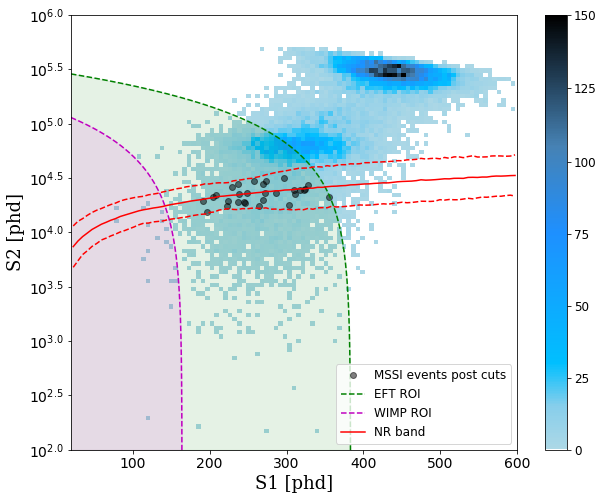

In [62]:
fig, ax = plt.subplots()
ax.fill_between(x_data, y_data_bot, np.log10(y_data2), color='magenta', alpha='0.1')
ax.fill_between(x_data, y_data_bot, np.log10(y_data), color='green', alpha='0.1')

matplotlib.pyplot.hist2d(fLXeS1c_phe[cuts2]+fRFRS1c_phe[cuts2], np.log10(fLXeS2c_phe[cuts2]), bins=num_bins, cmap=Peters, label='All MSSI events')#, normed=True)
#plt.plot(fLXeS1c_phe[cuts2]+fRFRS1c_phe[cuts2], np.log10(fLXeS2c_phe[cuts2]), '.k', label='MSSI events')
ax.plot(S1_NR_list, np.log10(np.asarray(S2_NR_list)), 'ok', alpha=.5,label='MSSI events post cuts')
ax.plot(x_data, np.log10(y_data), '--g', label='EFT ROI')
ax.plot(x_data, np.log10(y_data2), '--m', label='WIMP ROI')


#plt.plot(x_data, np.log10(y_data3), '--r', label='Xe131m energy')
ax.set_xlabel('S1 [phd]',fontsize=18,family='serif')
ax.set_ylabel('S2 [phd]',fontsize=18,family='serif')

ax.plot(NR_S1mean_list, NR_S2mean_list, '-r', label='NR band')
ax.plot(NR_S1mean_list, NR_S2upper_list, '--r')
ax.plot(NR_S1mean_list, NR_S2lower_list, '--r')



ax.set_xticklabels([0,100,200,300,400,500,600],fontsize=14)
ax.set_yticklabels(["10$^{2.0}$","10$^{2.5}$","10$^{3.0}$","10$^{3.5}$","10$^{4.0}$","10$^{4.5}$","10$^{5.0}$","10$^{5.5}$","10$^{6.0}$"],fontsize=14)



pylab.legend(loc='lower right', fontsize=12)

#cb=plt.colorbar()
cb=plt.colorbar(ticks=[0,25,50,75,100,125.5,151])
cb.ax.set_yticklabels(['0', '25', '50', '75', '100', '125', '150']) 

cb.ax.tick_params(labelsize=12)

plt.xlim(20,600)
plt.ylim(2, 6)

